<h2 id="--first step of data wrangling is to import data and identify_handle_missing_values">--first step of data wrangling is to import data and identify_handle_missing_values</h2>

In [1]:
import pandas as pd

In [2]:
#first, import data and read it

In [3]:
df = pd.read_csv("census_data.csv")

In [4]:
df.head()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,CASE_NUMBER,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,HK587712,18.2,27.5,23939.0,39.0
1,2.0,West Ridge,7.8,17.2,8.8,HK456306,20.8,38.5,23040.0,46.0
2,3.0,Uptown,3.8,24.0,8.9,HT233595,11.8,22.2,35787.0,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,HT133522,13.4,25.5,37524.0,17.0
4,5.0,North Center,0.3,7.5,5.2,HZ138551,4.5,26.2,57123.0,6.0


In [5]:
# second, scan data to look for missing values, and notice the nature of missing values i.e space, ? , nan or what eactly.

In [6]:
#replace the missing data with operable vaule like 0 or nan 

In [7]:
#to replace you should always import numpy lib

In [8]:
import numpy as np

In [9]:
df.replace("",np.nan,inplace = True)

In [10]:
df.tail()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,CASE_NUMBER,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
73,74.0,Mount Greenwood,1.0,3.4,8.7,HJ678713,4.3,36.8,34381.0,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,NaN,10.8,40.3,27149.0,30.0
75,76.0,O'Hare,3.6,15.4,7.1,HX155070,10.9,30.3,25828.0,24.0
76,77.0,Edgewater,4.1,18.2,9.2,HV402967,9.7,23.8,33385.0,19.0
77,NaN,CHICAGO,4.7,19.7,12.9,HX332979,19.5,33.5,28202.0,NaN


In [11]:
#Evaluating for Missing Data, this one is very very very important

In [12]:
eval = df.isnull()
series = 0
for column in eval.columns.values.tolist():
    series = series +1 
    print(series)
    print(column)
    print(eval[column].value_counts())
    print("")

1
COMMUNITY_AREA_NUMBER
False    77
True      1
Name: COMMUNITY_AREA_NUMBER, dtype: int64

2
COMMUNITY_AREA_NAME
False    78
Name: COMMUNITY_AREA_NAME, dtype: int64

3
PERCENT_OF_HOUSING_CROWDED
False    77
True      1
Name: PERCENT_OF_HOUSING_CROWDED, dtype: int64

4
PERCENT_HOUSEHOLDS_BELOW_POVERTY
False    76
True      2
Name: PERCENT_HOUSEHOLDS_BELOW_POVERTY, dtype: int64

5
PERCENT_AGED_16__UNEMPLOYED
False    77
True      1
Name: PERCENT_AGED_16__UNEMPLOYED, dtype: int64

6
CASE_NUMBER
False    74
True      4
Name: CASE_NUMBER, dtype: int64

7
PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA
False    78
Name: PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA, dtype: int64

8
PERCENT_AGED_UNDER_18_OR_OVER_64
False    78
Name: PERCENT_AGED_UNDER_18_OR_OVER_64, dtype: int64

9
PER_CAPITA_INCOME
False    77
True      1
Name: PER_CAPITA_INCOME, dtype: int64

10
HARDSHIP_INDEX
False    76
True      2
Name: HARDSHIP_INDEX, dtype: int64



In [13]:
#now lets replace each nan with compatible values

In [14]:
#for example, COMMUNITY_AREA_NUMBER column, this one is easy to replace as it correlate with the row number and goes in series

In [15]:
df["COMMUNITY_AREA_NUMBER"].replace(np.nan , 78)

0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
      ... 
73    74.0
74    75.0
75    76.0
76    77.0
77    78.0
Name: COMMUNITY_AREA_NUMBER, Length: 78, dtype: float64

In [16]:
#percent of housing crowded, this column has percent values, here we can replace nan with the mean(average)

In [17]:
hc_mean = df["PERCENT_OF_HOUSING_CROWDED"].mean()
df["PERCENT_OF_HOUSING_CROWDED"].replace(np.nan , hc_mean )

0     7.7
1     7.8
2     3.8
3     3.4
4     0.3
     ... 
73    1.0
74    0.8
75    3.6
76    4.1
77    4.7
Name: PERCENT_OF_HOUSING_CROWDED, Length: 78, dtype: float64

In [18]:
# PERCENT_HOUSEHOLDS_BELOW_POVERTY column is also percent , mean is used to replace nan

In [19]:
pov_mean = df["PERCENT_HOUSEHOLDS_BELOW_POVERTY"].mean()
df["PERCENT_HOUSEHOLDS_BELOW_POVERTY"].replace(np.nan , pov_mean)

0     23.6
1     17.2
2     24.0
3     10.9
4      7.5
      ... 
73     3.4
74    13.2
75    15.4
76    18.2
77    19.7
Name: PERCENT_HOUSEHOLDS_BELOW_POVERTY, Length: 78, dtype: float64

In [20]:
un16_mean = df["PERCENT_AGED_16__UNEMPLOYED"].mean()
df["PERCENT_AGED_16__UNEMPLOYED"].replace(np.nan , un16_mean)

0      8.7
1      8.8
2      8.9
3      8.2
4      5.2
      ... 
73     8.7
74    15.0
75     7.1
76     9.2
77    12.9
Name: PERCENT_AGED_16__UNEMPLOYED, Length: 78, dtype: float64

In [21]:
#CASE_NUMBER column has a number but could be left as it is or replaced with 0 as it is not significant value

In [22]:
df["CASE_NUMBER"].replace(np.nan , 0)

0     HK587712
1     HK456306
2     HT233595
3     HT133522
4     HZ138551
        ...   
73    HJ678713
74           0
75    HX155070
76    HV402967
77    HX332979
Name: CASE_NUMBER, Length: 78, dtype: object

In [23]:
#PER_CAPITA_INCOME it could be replaced with the mean

In [24]:
income_mean = df["PER_CAPITA_INCOME"].mean()
df["PER_CAPITA_INCOME"].replace(np.nan , income_mean)

0     23939.0
1     23040.0
2     35787.0
3     37524.0
4     57123.0
       ...   
73    34381.0
74    27149.0
75    25828.0
76    33385.0
77    28202.0
Name: PER_CAPITA_INCOME, Length: 78, dtype: float64

In [25]:
#HARDSHIP_INDEX this column has the values that we need to expect so the row containg the nan values should be deleted(dropped)

In [26]:
df.dropna(subset=["HARDSHIP_INDEX"], axis = 0 , inplace = True)

In [27]:
df.tail()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,CASE_NUMBER,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
72,73.0,Washington Height,1.1,16.9,20.8,HY291329,13.7,42.6,19713.0,48.0
73,74.0,Mount Greenwood,1.0,3.4,8.7,HJ678713,4.3,36.8,34381.0,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,NaN,10.8,40.3,27149.0,30.0
75,76.0,O'Hare,3.6,15.4,7.1,HX155070,10.9,30.3,25828.0,24.0
76,77.0,Edgewater,4.1,18.2,9.2,HV402967,9.7,23.8,33385.0,19.0


In [28]:
#The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

#In Pandas, we use

#.dtypes to check the data type

#.astype() to change the data type
#for example df.[["column"]] or df.[["column1"],["column2"]]= df[["column"]] or df[["column1"], ["column2"]].astype("int") or ("float")

In [29]:
df.dtypes

COMMUNITY_AREA_NUMBER                           float64
COMMUNITY_AREA_NAME                              object
PERCENT_OF_HOUSING_CROWDED                      float64
PERCENT_HOUSEHOLDS_BELOW_POVERTY                float64
PERCENT_AGED_16__UNEMPLOYED                     float64
CASE_NUMBER                                      object
PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA    float64
PERCENT_AGED_UNDER_18_OR_OVER_64                float64
PER_CAPITA_INCOME                               float64
HARDSHIP_INDEX                                  float64
dtype: object

## --second step of wrangling is Data Standardization

In [30]:
#remaning a column in the data set

In [31]:
df.rename(columns = {"PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA":"age25_nodiploma"}, inplace = True)

In [32]:
df.columns

Index(['COMMUNITY_AREA_NUMBER', 'COMMUNITY_AREA_NAME',
       'PERCENT_OF_HOUSING_CROWDED', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY',
       'PERCENT_AGED_16__UNEMPLOYED', 'CASE_NUMBER', 'age25_nodiploma',
       'PERCENT_AGED_UNDER_18_OR_OVER_64', 'PER_CAPITA_INCOME',
       'HARDSHIP_INDEX'],
      dtype='object')

In [33]:
#visualizing some of the results

In [34]:
%matplotlib inline 
import seaborn as sns

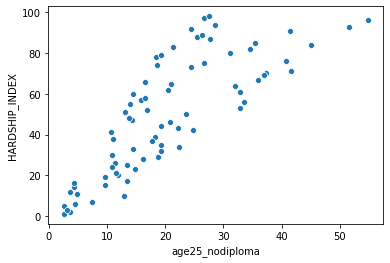

In [35]:
plot = sns.scatterplot(x = 'age25_nodiploma', y='HARDSHIP_INDEX', data = df)

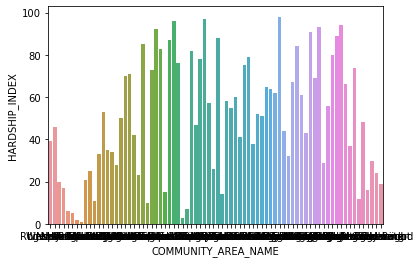

In [36]:
plot = sns.barplot(x = 'COMMUNITY_AREA_NAME', y='HARDSHIP_INDEX', data = df)

<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)
</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>

<b>Example</b>
<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km?</p>


In [37]:
df.dtypes

COMMUNITY_AREA_NUMBER               float64
COMMUNITY_AREA_NAME                  object
PERCENT_OF_HOUSING_CROWDED          float64
PERCENT_HOUSEHOLDS_BELOW_POVERTY    float64
PERCENT_AGED_16__UNEMPLOYED         float64
CASE_NUMBER                          object
age25_nodiploma                     float64
PERCENT_AGED_UNDER_18_OR_OVER_64    float64
PER_CAPITA_INCOME                   float64
HARDSHIP_INDEX                      float64
dtype: object

In [38]:
#the income is in dollars, what if I want to change it to another currncy, let's say EGP

In [39]:
df['PER_CAPITA_INCOME'] = df['PER_CAPITA_INCOME'] * 15

In [40]:
df['PER_CAPITA_INCOME']

0     359085.0
1     345600.0
2     536805.0
3     562860.0
4     856845.0
        ...   
72    295695.0
73    515715.0
74    407235.0
75    387420.0
76    500775.0
Name: PER_CAPITA_INCOME, Length: 76, dtype: float64

In [41]:
df.rename(columns = {'PER_CAPITA_INCOME':'income_in_EGP'},inplace = True)

In [42]:
df.columns

Index(['COMMUNITY_AREA_NUMBER', 'COMMUNITY_AREA_NAME',
       'PERCENT_OF_HOUSING_CROWDED', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY',
       'PERCENT_AGED_16__UNEMPLOYED', 'CASE_NUMBER', 'age25_nodiploma',
       'PERCENT_AGED_UNDER_18_OR_OVER_64', 'income_in_EGP', 'HARDSHIP_INDEX'],
      dtype='object')

<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1
</p>

<b>Example</b>
<p>To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height" </p>
<p><b>Target:</b>would like to Normalize those variables so their value ranges from 0 to 1.</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>

In [43]:
#data normalization has many ways one is simple feature scaling (using max value)

In [44]:
df['HARDSHIP_INDEX'] = df['HARDSHIP_INDEX']/df['HARDSHIP_INDEX'].max()

In [45]:
df['HARDSHIP_INDEX']

0     0.397959
1     0.469388
2     0.204082
3     0.173469
4     0.061224
        ...   
72    0.489796
73    0.163265
74    0.306122
75    0.244898
76    0.193878
Name: HARDSHIP_INDEX, Length: 76, dtype: float64

In [46]:
# second is min-max method:

In [47]:
df['HARDSHIP_INDEX'] = (df['HARDSHIP_INDEX']-df['HARDSHIP_INDEX'].min())/(df['HARDSHIP_INDEX'].max()-df['HARDSHIP_INDEX'].min())

In [48]:
df['HARDSHIP_INDEX']

0     0.391753
1     0.463918
2     0.195876
3     0.164948
4     0.051546
        ...   
72    0.484536
73    0.154639
74    0.298969
75    0.237113
76    0.185567
Name: HARDSHIP_INDEX, Length: 76, dtype: float64

In [49]:
#third methods and the most important one is the Z-score method

In [50]:
df['HARDSHIP_INDEX'] = (df['HARDSHIP_INDEX']-df['HARDSHIP_INDEX'].mean())/df['HARDSHIP_INDEX'].std()

In [51]:
df['HARDSHIP_INDEX']

0    -0.388146
1    -0.142320
2    -1.055388
3    -1.160742
4    -1.547040
        ...   
72   -0.072084
73   -1.195860
74   -0.704208
75   -0.914916
76   -1.090506
Name: HARDSHIP_INDEX, Length: 76, dtype: float64

In [52]:
df.head()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,CASE_NUMBER,age25_nodiploma,PERCENT_AGED_UNDER_18_OR_OVER_64,income_in_EGP,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,HK587712,18.2,27.5,359085.0,-0.388146
1,2.0,West Ridge,7.8,17.2,8.8,HK456306,20.8,38.5,345600.0,-0.142320
2,3.0,Uptown,3.8,24.0,8.9,HT233595,11.8,22.2,536805.0,-1.055388
3,4.0,Lincoln Square,3.4,10.9,8.2,HT133522,13.4,25.5,562860.0,-1.160742
4,5.0,North Center,0.3,7.5,5.2,HZ138551,4.5,26.2,856845.0,-1.547040


In [53]:
#visalizing the income as a histogram using matplotlib
#notice here we don't use seaborn lib as barplot or jointplot becaue this needs two column, however, matplotlib.pyplot.hist or pyplot.bar can creat histogram using one numerical column

In [54]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'income bins')

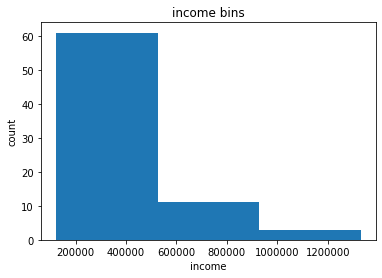

In [55]:
plt.pyplot.hist(df['income_in_EGP'] , bins = 3)

#you can make the histogram more understandable by naming axis and labeling the histogram

plt.pyplot.xlabel("income")
plt.pyplot.ylabel("count")
plt.pyplot.title("income bins")

In [56]:
df['income_in_EGP'].max()


1330035.0

In [57]:
df['income_in_EGP'].min()

123015.0

In [58]:
bins = np.linspace(min(df['income_in_EGP']),max(df['income_in_EGP']), 4)

In [59]:
bins

array([ 123015.,  525355.,  927695., 1330035.])

In [60]:
groups = ['low', 'medium', 'high']

In [61]:
df['income_pinned']= pd.cut(df['income_in_EGP'], bins , labels = groups , include_lowest = True )

In [62]:
df[['income_pinned', 'income_in_EGP']].head(10)

,income_pinned,income_in_EGP
0,low,359085.0
1,low,345600.0
2,medium,536805.0
3,medium,562860.0
4,medium,856845.0
5,medium,900870.0
6,high,1073265.0
7,high,1330035.0
9,low,493125.0
10,low,416265.0


In [63]:
group_counts = df['income_pinned'].value_counts()

Text(0.5, 1.0, 'income bins')

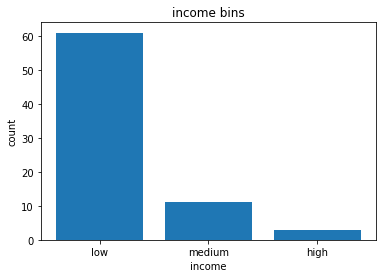

In [64]:
pyplot.bar(groups, group_counts)
plt.pyplot.xlabel("income")
plt.pyplot.ylabel("count")
plt.pyplot.title("income bins")

(array([61., 11.,  3.]),
 array([ 123015.,  525355.,  927695., 1330035.]),
 <a list of 3 Patch objects>)

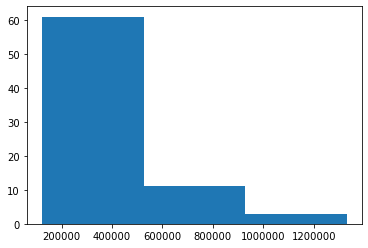

In [65]:
plt.pyplot.hist(df['income_in_EGP'] , bins = 3)

<h2 id="indicator">Indicator variable (or dummy variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>
<p>
    So we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.
</p>

<p>
    We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>

In [66]:
income_dummies = pd.get_dummies(df['income_pinned'])
income_dummies.head()

income_pinned,low,medium,high
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [67]:
df = pd.concat([df , income_dummies] , axis = 1 )

In [68]:
df.head()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,CASE_NUMBER,age25_nodiploma,PERCENT_AGED_UNDER_18_OR_OVER_64,income_in_EGP,HARDSHIP_INDEX,income_pinned,low,medium,high
0,1.0,Rogers Park,7.7,23.6,8.7,HK587712,18.2,27.5,359085.0,-0.388146,low,1,0,0
1,2.0,West Ridge,7.8,17.2,8.8,HK456306,20.8,38.5,345600.0,-0.142320,low,1,0,0
2,3.0,Uptown,3.8,24.0,8.9,HT233595,11.8,22.2,536805.0,-1.055388,medium,0,1,0
3,4.0,Lincoln Square,3.4,10.9,8.2,HT133522,13.4,25.5,562860.0,-1.160742,medium,0,1,0
4,5.0,North Center,0.3,7.5,5.2,HZ138551,4.5,26.2,856845.0,-1.547040,medium,0,1,0


In [69]:
df.drop('income_pinned', axis = 1 , inplace = True)

In [70]:
df.head()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,CASE_NUMBER,age25_nodiploma,PERCENT_AGED_UNDER_18_OR_OVER_64,income_in_EGP,HARDSHIP_INDEX,low,medium,high
0,1.0,Rogers Park,7.7,23.6,8.7,HK587712,18.2,27.5,359085.0,-0.388146,1,0,0
1,2.0,West Ridge,7.8,17.2,8.8,HK456306,20.8,38.5,345600.0,-0.142320,1,0,0
2,3.0,Uptown,3.8,24.0,8.9,HT233595,11.8,22.2,536805.0,-1.055388,0,1,0
3,4.0,Lincoln Square,3.4,10.9,8.2,HT133522,13.4,25.5,562860.0,-1.160742,0,1,0
4,5.0,North Center,0.3,7.5,5.2,HZ138551,4.5,26.2,856845.0,-1.547040,0,1,0


In [74]:
#exporting data as csv file 
df.to_csv("data.csv", index = False)